# FB Prophet 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [91]:
data['ds']=data['Month']
data['y']=data['#Passengers']

In [92]:
df=data.drop(['Month', '#Passengers'], axis=1)

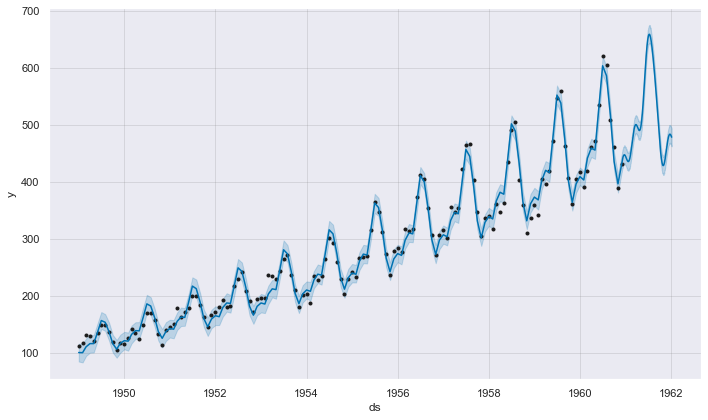

In [93]:
#Prophet može da učita samo kolone ds i y, datum i vrednost

from fbprophet import Prophet
sns.set(font_scale=1) 

m = Prophet(seasonality_mode='multiplicative',
            daily_seasonality=False, 
            weekly_seasonality=False, 
            yearly_seasonality=4,
           seasonality_prior_scale=0.1) #parametar koji modulira jačinu sezone, veće vrednosti dopuštaju veće sezonske fluktuacije
m.fit(df)
future = m.make_future_dataframe(periods=400,freq='D') #predviđanje za budućih 400 vremenskih tačaka
forecast = m.predict(future)
fig = m.plot(forecast)

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


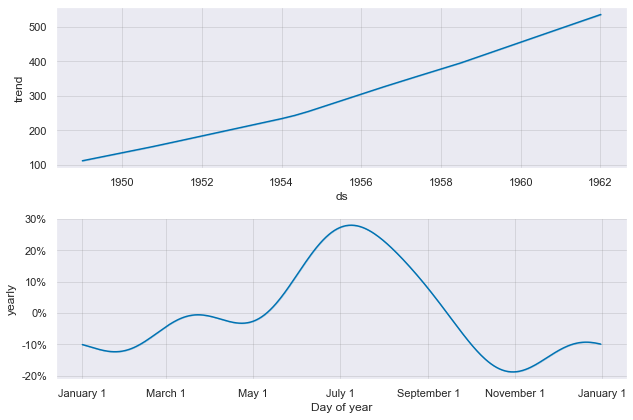

In [94]:
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


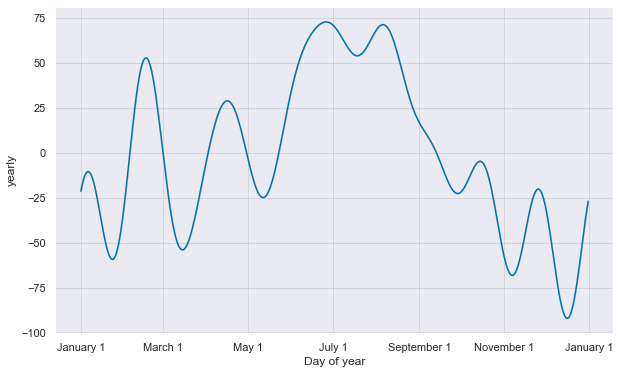

In [95]:
from fbprophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

In [96]:
#ako bismo imali prediktore, mogli bismo da ih dodamo u model kao regresore
#m.add_regressor('temp', prior_scale=0.5, mode='multiplicative')

In [97]:
date = pd.to_datetime(df['ds'])

In [98]:
#Kreiraćemo regresor leto

# Python
def leto(ds):
    date = pd.to_datetime(ds)
    if date.month > 5 and date.month < 9:
        return 1
    else:
        return 0


In [99]:
df['leto'] = df['ds'].apply(leto)

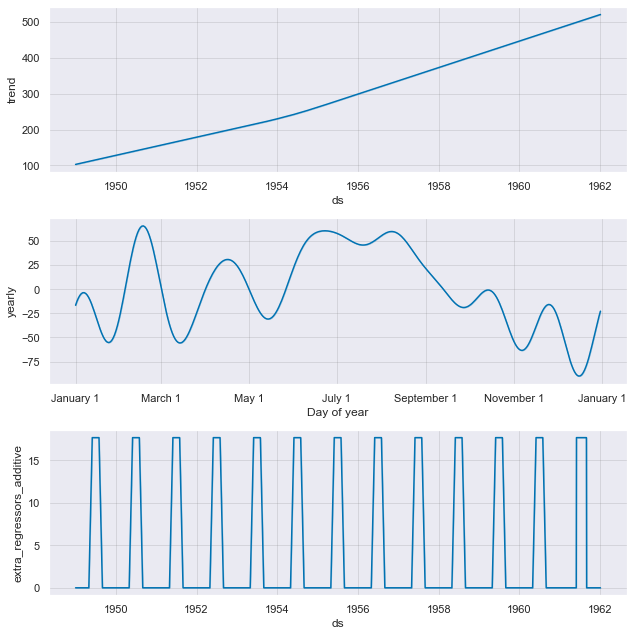

In [100]:
m = Prophet(weekly_seasonality=False, daily_seasonality=False)
m.add_regressor('leto')
m.fit(df)

future['leto'] = future['ds'].apply(leto)

forecast = m.predict(future)
fig = m.plot_components(forecast)

In [101]:
#dogodila se korona 1960
def korona(date):
    date = pd.to_datetime(date)
    if date.year == 1960:
        return 1
    else:
        return 0

In [102]:
#zamislimo da se korona desila 1960
df['korona'] = df['ds'].apply(korona)

In [106]:
#malo krivotvorimo podatke, dajemo vrednost od 10 putnika
df['y'][df['korona']==1]=10

<ipython-input-106-547fcd0b9026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][df['korona']==1]=10


In [109]:
df['holidays']=df['korona']

In [111]:
df

,ds,y,leto,korona,holidays
0,1949-01,112,0,0,0
1,1949-02,118,0,0,0
2,1949-03,132,0,0,0
3,1949-04,129,0,0,0
4,1949-05,121,0,0,0
...,...,...,...,...,...
139,1960-08,10,1,1,1
140,1960-09,10,0,1,1
141,1960-10,10,0,1,1
142,1960-11,10,0,1,1


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


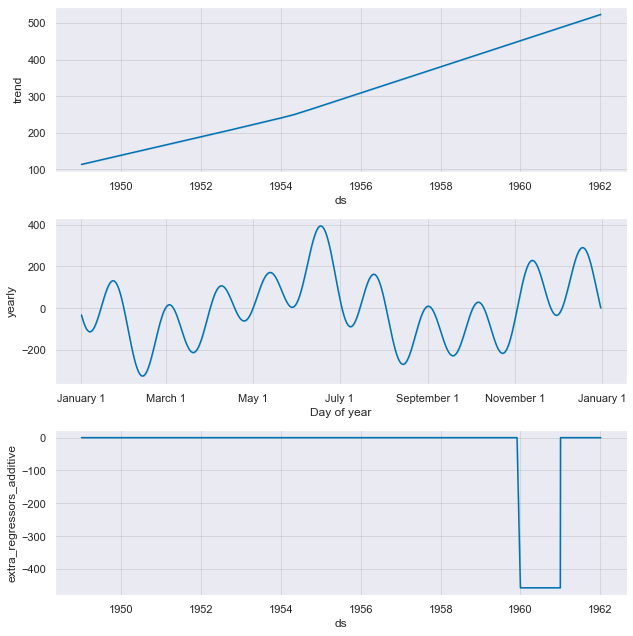

In [113]:
m = Prophet()
m.add_regressor('korona')
m.fit(df)

future['korona'] = future['ds'].apply(korona)

forecast = m.predict(future)
fig = m.plot_components(forecast)